# Homework 4: Support Vector Machines (SVM)

## Practical assignment objective:

This assignment is aimed at coding a perceptron from scratch in order to learn how this simple but powerful linear binary classifier works.

In the following sections you can find a brief summary on what a perceptron is and how it works, and finally the text of the assignment.

(The text and the pictures of this section were taken from Haykin, O., "Neural Networks and Learning Machines", Pearson, 2009)

This exercise can be done in pairs. **You must first copy this notebook to your own google drive, mount it and complete the code as requested. Some of the questions require you to write on a comment cell.**

After completing the notebook you must download it and manually send it before the deadline by email to the email: si221.micas911@gmail.com

Copy this notebook and insert the corresponding names on the file.

**If you have any questions feel free to send an email to the TA's:**

### breno.skuk@gmail.com

### julien.beguinot@telecom-paris.fr


# About about the perceptron algorithm

## Historical introduction

The perceptron occupies a special place in the historical development of neural networks:
It was the first algorithmically described neural network. Its invention by Rosenblatt, a psychologist, inspired engineers, physicists, and mathematicians alike to devote their research effort to different aspects of neural networks in the 1960s and the 1970s.

The perceptron is the simplest form of a neural network used for the classification of data said to be linearly separable (i.e., data that lie on opposite sides of a hyperplane). Basically, it consists of a single neuron with adjustable synaptic weights and bias.

The algorithm used to adjust the free parameters of this neural network first appeared in a learning procedure developed by Rosenblatt for his perceptron brain model. Indeed, Rosenblatt proved that if the data
used to train the perceptron are drawn from two linearly separable classes, then the perceptron algorithm finds hyperplane that separates the two classes.

 A perceptron is limited to performing pattern classification with only two classes. By expanding the output (computation) layer of the perceptron to include more than one neuron, we may perform classification with more than two classes. This is left as an bonus exercise on this TP!


## Working with a perceptron

A perceptron consists of a linear combiner followed by a hard limiter (e.g. the sign
function, the Heaviside step function or a simple function like these) (see Figure 1).



**Figure 1: Perceptron graph representation.**
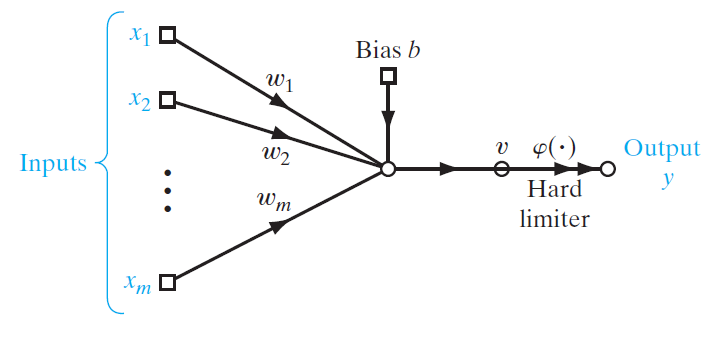

The summing node of the neural model computes a linear combination of the inputs applied to its synapses, as well as incorporates an externally applied bias. The resulting sum is applied to a hard limiter. Accordingly, for example if the hard limiter is the Heaviside step function, the neuron produces an output equal to 1 if the hard limiter input is positive, and 0 if it is negative. The synaptic weights of the perceptron are denoted by $w_1$, $w_2$, ...,$w_m$. Correspondingly, the inputs applied to the perceptron are denoted by $x_1$, $x_2$, ..., $x_m$. The externally applied bias is denoted by $b$. From the model, we find that the hard limiter input of the neuron is:

\begin{equation*}
v=\sum_{i=1}^{m} w_i x_i + b.
\end{equation*}

The goal of the perceptron is to correctly classify the set of externally applied stimuli $x_1$, $x_2$, ..., $x_m$ into one of two classes, $\mathcal{C}_1$ or $\mathcal{C}_2$. The decision rule for the classification is to assign the sample represented by the inputs $x_1$, $x_2$, ..., $x_m$ to class $\mathcal{C}_1$ if the perceptron output $y$ is 1 and to class $\mathcal{C}_2$ if it is 0. To develop insight into the behavior of a classifier, it is customary to plot
a map of the decision regions in the $m$-dimensional signal space spanned by the m input variables $x_1$, $x_2$, ..., $x_m$. In the simplest form of the perceptron, there are two decision regions separated by a hyperplane, which is defined by:
\begin{equation*}
\sum_{i=1}^{m} w_i x_i + b =0.
\end{equation*}

This is illustrated in Figure 2 for the case of two input variables $x_1$ and $x_2$, for which the
decision boundary takes the form of a straight line.

**Figure 2: Halfspace classifier with bias in $\mathbb{R}^2$.**

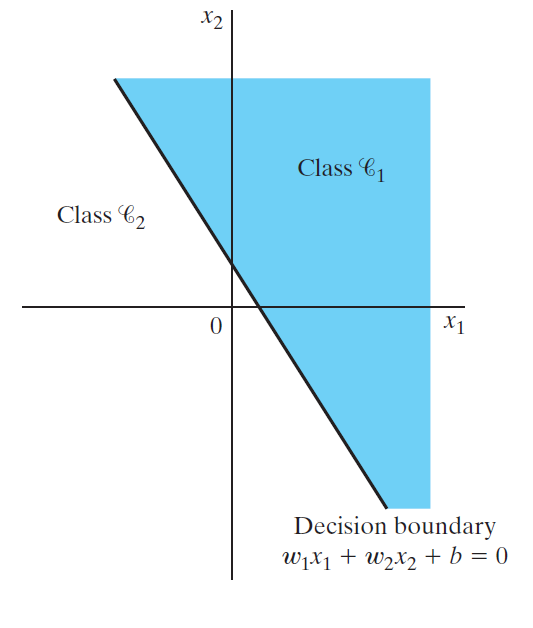

A sample $(x_1, x_2)$ that lies above the boundary line is assigned to class $\mathcal{C}_1$, and a sample $(x_1, x_2)$ that lies below the boundary line is assigned to class $\mathcal{C}_2$. Note also that the bias $b$ merely shifts the decision boundary away from the origin. The synaptic weights $w_1$, $w_2$, ..., $w_m$ of the perceptron can be adapted on an iteration by iteration basis called **error-correction rule**. To derive this rule, it is more convenient to work with the modified model in Figure 3. In this model, equivalent to the one of Figure 1, the bias $b$ is treated as a synaptic weight driven by a fixed input equal to +1. We may thus define the $(m + 1)$-by-1 input vector:
\begin{equation*}
\mathbf{x}(n) = \begin{bmatrix}
	1 & x_1(n) & x_2(n) & \cdots & x_m(n)
\end{bmatrix}^{\mathrm{T}},
\end{equation*}
where $n$ denotes the time-step in applying the algorithm, $x_0(n)=1$ and $\mathbf{x}(n)$ denotes the $n$th input vector of the data set $\{\mathbf{x}(1),\ldots,\mathbf{x}(N)\}$. Correspondingly, we define the $(m + 1)$-by-1 weight vector as:
\begin{equation*}
\mathbf{w}(n) = \begin{bmatrix}
	b(n) & w_1(n) & w_2(n) & \cdots & w_m(n)
\end{bmatrix}^{\mathrm{T}},
\end{equation*}
where $w_0(n)=b(n)$ and $\mathbf{w}(n)$ denotes the weight vector at the $n$th iteration of the algorithm.

Accordingly, the linear combiner output is written in the compact form as follows:

\begin{align*}
	v&= \langle \mathbf{w}(n),\mathbf{x}(n) \rangle = \sum\limits_{i=0}^m w_i(n)\,x_i(n)=\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n),\\
	y&=\varphi\left(\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n)\right).
\end{align*}

**Figure 3: Inclusion of bias into halfspace classifier. Notice that the dimension of the input is increased but the added dimension value remains fixed.**

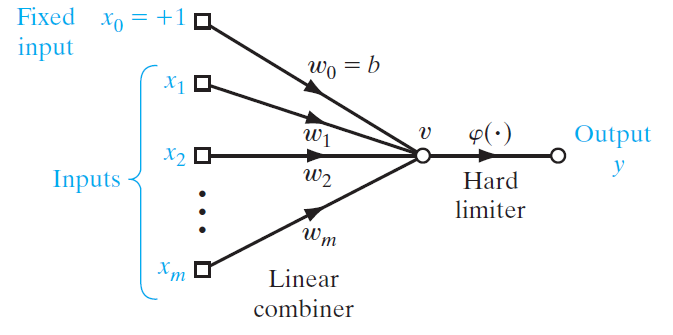

 Suppose then that the input variables of the perceptron originate from two linearly separable classes. Let $\mathcal{H}_1$ be the halfspace of training vectors that belong to class $\mathcal{C}_1$, and let $\mathcal{H}_2$  be the halfspace of training vectors that belong to class $\mathcal{C}_2$. The union of $\mathcal{H}_1$ and $\mathcal{H}_2$ is the complete space denoted by $\mathcal{H}$. Given the sets of vectors $\mathcal{H}_1$ and $\mathcal{H}_2$ to train the classifier, the training process involves the adjustment of the weight vector $\mathbf{w}$ in such a way that the two classes $\mathcal{C}_1$ and $\mathcal{C}_2$ are linearly separable. That is, there exists a weight vector $\mathbf{w}$ such that we may state:

$\mathbf{w}^{\mathrm{T}}\,\mathbf{x}>0$ for every input vector $\mathbf{x}$ belonging to class $\mathcal{C}_1$

$\mathbf{w}^{\mathrm{T}}\,\mathbf{x}\leq0$ for every input vector $\mathbf{x}$ belonging to class $\mathcal{C}_2$

We arbitrarily chose that the input vector $\mathbf{x}$ belongs to class $\mathcal{C}_2$ if $\mathbf{w}^{\mathrm{T}}\,\mathbf{x}=0$. Given the subsets of training vectors $\mathcal{H}_1$ and $\mathcal{H}_2$, the training problem for the perceptron is then to find a weight vector $\mathbf{w}$ such that the two inequalities above are satisfied. The algorithm for adapting the weight vector of the elementary perceptron may now be formulated as follows:




**1**:
If the $n$th member of the training set, $\mathbf{x}(n)$, is correctly classified by the weight vector $\mathbf{w}(n)$ computed at the $n$th iteration of the algorithm, no correction is made to the
weight vector of the perceptron according to the rule:



*   if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) >0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_1$:

$$\mathbf{w}(n + 1) = \mathbf{w}(n)$$
*   if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) \leq 0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_2$:

$$\mathbf{w}(n + 1) = \mathbf{w}(n)$$

**2**:  Otherwise, the weight vector of the perceptron is updated according to
the rule:



* if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) > 0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_2$:
 $$\mathbf{w}(n + 1) = \mathbf{w}(n) - \eta(n)\,\mathbf{x}(n)$$

* if $\mathbf{w}^{\mathrm{T}}(n)\,\mathbf{x}(n) \leq 0$ and $\mathbf{x}(n)$ belongs to class $\mathcal{C}_1$:

 $$\mathbf{w}(n + 1) = \mathbf{w}(n) + \eta(n)\,\mathbf{x}(n)$$

where the learning-rate parameter $\eta(n)$ controls the adjustment applied to the weight vector at iteration $n$. If $\eta(n)\!=\!\eta\!>\! 0$, where $\eta$ is a constant independent of the iteration number $n$, then we have a fixed-increment adaptation rule for the perceptron. The adaptation of the weight vector $\mathbf{w}(n)$ is nicely summarized in the form:
\begin{equation}
\mathbf{w}(n + 1) = \mathbf{w}(n) + \eta \left(d(n) - y(n)\right)\mathbf{x}(n), \end{equation}
where $d(n)$ is the desired output for $\mathbf{x}(n)$.

# Exercise 1: Synthetic data

For the rest of the question complete the cells below as requested.

### Imports:

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plot data

In [3]:
# Plot data
def plot(X, Y, w=np.array([]), xlabel=None, ylabel=None, tick_labels=None):
    """
    Parameters:
    -----------
    X: input data [N x d]
    Y: labels [N x 1]
    W: perceptron weights [d x 1] or [d+1 x 1] (if bias was included)

    """
    # data
    plt.figure( figsize=(8,6) )

    sc = plt.scatter( X[:,0], X[:,1], c=Y )
    cb = plt.colorbar(sc)
    cb.set_ticks( np.sort( np.unique(Y) ) )
    if tick_labels != None:
        cb.set_ticklabels( tick_labels )

    if xlabel != None:
        plt.xlabel(xlabel, fontsize=14)
    if ylabel != None:
        plt.ylabel(ylabel, fontsize=14)

    if w.size != 0:
        # separating hyperplane
        y1, y2 = plt.ylim()

        if w.shape[0] == 3:
          w1 = w[0]
          w2 = w[1]
          b  = w[2]

        else:
          w1 = w[0]
          w2 = w[1]
          b  = 0


        lb = min(X[:, 0])
        ub = max(X[:, 0])

        # Plotting the line using w1, w2, and b
        x_line = np.linspace(lb, ub, 400)  # Generate x values
        y_line = (-b - w1 * x_line) / w2  # Calculate corresponding y values

        plt.plot(x_line, y_line, c='black', linestyle='--')

        plt.ylim(y1, y2)

    # Add a grid
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

## Part 1

Consider a data set $\mathcal{S} = \{\mathbf{x}(n),d(n)\}_{n=1}^{N}$ consisting of $N=200$ points $\mathbf{x}(n)=(x_1(n),x_2(n))$ and their corresponding labels $d(n)$, such that the first 100 points have label $d(n)=1$ and are generated according to a Gaussian distribution $\mathcal{N}(\left[1, 0\right],\sigma^2 \mathbf{I})$, and such that the other 100 points have label $d(n)=0$ and are generated according to a Gaussian distribution $\mathcal{N}(\left[-1, 0\right],\sigma^2 \mathbf{I})$.

 In order to visualize each generated data set and the corresponding solution given by the algorithm, **plot all generated points in a coordinate plane and the estimated decision line, given by the estimated coefficients of the perceptron at the convergence.**

**Complete the shuffling and data generating functions.**

!!Attention!!

A common mistake when generating data samples is using the wrong distribution parameters.

np.random.normal(loc=0.0, scale=1.0, size=None) uses the std deviation to generate samples, not variance.

To avoid mistakes like this always read the documentation of the
libraries you are importing.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [4]:
# Generate a random permutation of indices
def shuffle_data(X,Y):
    """
    Parameters:
    -----------
    X: R2 points [N x 2]
    Y: Labels [N x 1]

    Returns:
    --------
    permutated X: R2 points [N x 2]
    permutated Y: Labels [N x 1]

    """

    permutation = np.linspace(0, len(X)-1, len(X)).astype(int)
    np.random.shuffle(permutation)



    return X[permutation], Y[permutation]

In [5]:

def generate_data(N, mean_1, mean_2, var, shuffle = True, seed = -1):
  """
  Parameters:
  -----------
  N: number of data point
  mean_1: mean of first normal distribution
  mean_2: mean of second normal distribution
  var: variance of both normal distributions
  shuffle: boolean to shuffle or not generated data
  seed: random seed of the data generator

  Returns:
  --------
  X: R2 points [N x 2]
  Y: Labels [N x 1]

  """
  # set random seed
  if seed >= 0:
    np.random.seed(seed)

  #  Create zero data
  X_zero = np.random.normal(mean_1, [np.sqrt(var), np.sqrt(var)], [int(N/2), 2])

  # Create ones data
  X_one =  np.random.normal(mean_2, [np.sqrt(var), np.sqrt(var)], [int(N/2), 2])

  # Concatenate arrays along axis 0
  X = np.concatenate( (X_zero, X_one), axis=0 )

  # Create an array filled with ones and another filled with zeros
  ones_array = np.ones([int(N/2),1])
  zeros_array = np.zeros([int(N/2),1])

  # Concatenate the arrays along axis 0 to create Y
  Y = np.concatenate((ones_array, zeros_array), axis=0)

  if shuffle:
    # shuffle data
    X,Y = shuffle_data(X,Y)

  return X,Y

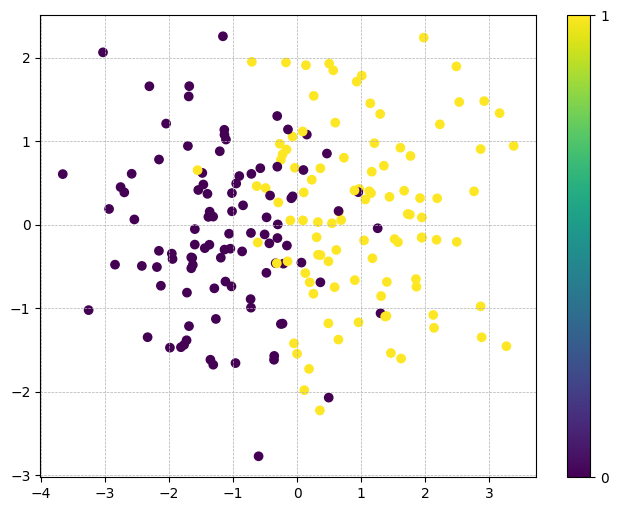

In [6]:
# Test data generation
X, Y = generate_data(N = 200, mean_1 = [1,0], mean_2 = [-1,0], var = 1, seed = 0)

plot(X, Y)

## Part 2
**Complete the perceptron code function below.**

In [7]:
def heavy(x):
  return 1*x>=0

In [8]:
from numpy.ma.core import transpose
# Perceptron algorithm
def perceptron( X, Y, lr, nb_epochs=100, eps=1e-4):
    """
    Parameters:
    -----------
    X: input data [N x d]
    Y: labels [N x 1]

    Returns:
    --------
    W: perceptron weights [d x 1]
    """
    # number of samples
    N = X.shape[0]
    # get dimension of input data
    d = X.shape[1]

    # initialize w
    w = np.zeros(shape = (d))

    # each epoch corresponds to a whole pass through the dataset
    for _ in range(nb_epochs):
        # store previous weights
        w_prev = w

        for xi, x in enumerate(X):

          out = heavy(np.dot(np.transpose(w_prev), x))

          if (out == 0 and Y[xi] == 1):
            w = w + lr*x
          elif (out == 1 and Y[xi] == 0):
            w = w - lr*x

        # exit loop if L2 norm between updates is small
        if np.linalg.norm( w - w_prev, ord = 2) <= eps:
            break

    return w

## Bias:

**What should we do if we wanted to implement bias in the perceptron without modifying the algorithm?**



**Answer**: we had 1 at the begining of each x and a bias to our vector w


## Prediction

**Complete the prediction function:**


In [9]:
def predict(X, w):
  # include bias
  if w.shape[0] == 3:

    Y_pred = heavy(np.dot(np.concatenate((X, np.ones([len(X), 1])), axis=1), np.expand_dims(np.transpose(w), 1)))
  else:
    Y_pred = heavy(np.dot(X, np.expand_dims(np.transpose(w), 1)))
  # Add one dimension along axis -1
  return Y_pred

## Evaluation metric:

**Implement the accuracy metric:**

In [10]:
def accuracy(Y, Y_pred):
    """
    Parameters:
    -----------
    Y: labels [N x 1]
    Y_pred: predicted labels [N x 1]

    Returns:
    --------
    acc: accuracy
    """
    acc = (Y == Y_pred).sum()/len(Y)

    return acc

## Bias and no Bias:

**Train the perceptron on randomly generated data (in $\mathbb{R}^2$) of your choice with and without bias. Can you generate an example where bias is necessary to correctly classify all data.**

In [11]:
X, Y = generate_data(N = 200, mean_1 = [1,0], mean_2 = [-1,0], var = 1, seed = 0)
print(perceptron(X, Y, 1, 100))
X = np.concatenate((X, np.ones([len(X), 1])), axis = 1)
print(perceptron(X, Y, 1, 100))

[70.42014748 10.63410523]
[44.40164612  4.62692609  6.        ]


## Shuffling

**In the following experiment we train the perceptron with shuffled and unshuffled data.
What can you say about the importance of shuffling data when training the perceptron?**



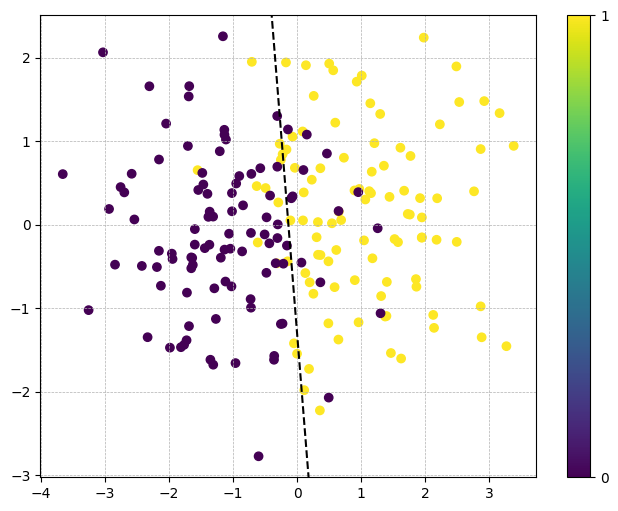

[44.40164612  4.62692609  6.        ]
[44.40164612  4.62692609  6.        ]


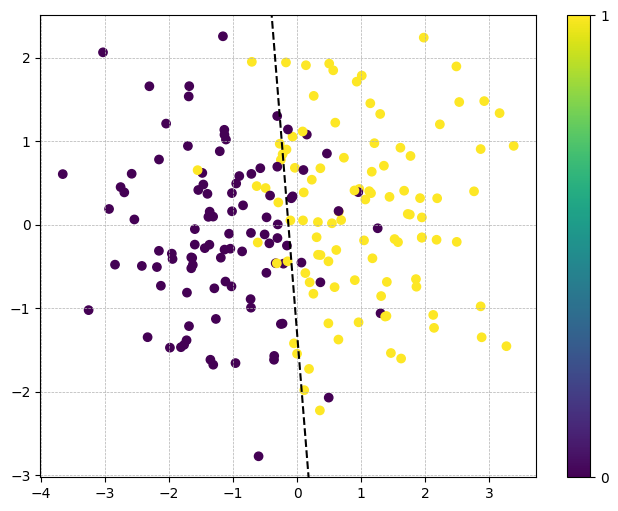

In [12]:
# Test data generation
X, Y = generate_data(N = 200, mean_1 = [1,0], mean_2 = [-1,0], var = 1, shuffle = False, seed = 0)

include_bias = True
nb_epochs = 100
lr = 1

# include bias
if include_bias:
  w = perceptron(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ), Y, lr)
else:
  w = perceptron(X, Y, lr)

# plot unshuffled data
plot(X,Y,w)
print(w)

X, Y = shuffle_data(X,Y)
# include bias
if include_bias:
  w = perceptron(np.concatenate((X, np.ones((X.shape[0],1)) ), axis=1 ), Y, lr)
else:
  w = perceptron(X, Y, lr)
print(w)
# plot nshuffled data
plot(X,Y,w)

**Answer:** It does not change that much since the number of epoch sihigh, for a small umber of epoch it changes slightly

## Evaluate train and test accuracy using the provided functions:

**How could we get a good estimate of the true risk?**

**Answer:**

In [13]:
X_test, Y_test = generate_data(N = 1000, mean_1 = [1,0], mean_2 = [-1,0], var = 1)
Y_test_pred = predict(X_test, w)
test_accuracy = accuracy(Y_test, Y_test_pred)
print(f'Test accuracy = {test_accuracy}')

Test accuracy = 0.819


## Evaluate the computational complexity of training the perceptron in terms of arithmetic operations per iteration.

**To simplify your analysis you can think only in number of addition/multiplications per epoch. Would you consider your implementation efficient?**

**Answer**: Per epoch there is at most N*4 addition for all the tested data (4 additions is for the matrix multiplication of w ad x)

## Part 3:

In the next two experiments we have 100 points with label $d(n)=1$ generated according to a Gaussian distribution $\mathcal{N}(\left[1, 0\right],\sigma^2 \mathbf{I})$, and 100 points that have label $d(n)=0$ and are generated according to a Gaussian distribution $\mathcal{N}(\left[-1, 0\right],\sigma^2 \mathbf{I})$

Here we consider four different values $\{0.05, 0.25, 0.50, 0.75\}$ of the variance $\sigma^2$. For each of these values, we run the perceptron over 50 randomly generated data sets, compute the average error $e(\sigma^2)$ and its standard deviation $s(\sigma^2)=\sqrt{\frac{1}{50}\sum_{i=1}^{50}(e_i-e)^2}$, where $e_i$ denotes the fraction of misclassified points.



**Represent graphically $e(\sigma^2)$ and $s(\sigma^2)$ for the four values of $\sigma^2$ (use error bars).**

In [14]:
# don't change the random seed
np.random.seed(0)

# list of variances
var_list = np.array([0.05, 0.25, 0.50, 0.75])

# dataset size
N = 100

# train parameters
lr = 1
include_bias = True

mean_error = []
std_error = []

for var in var_list:

    e = []

    for i in range(50):

        # generate data
        X, Y = generate_data(N = N, mean_1 = [1,0], mean_2 = [-1,0], var = var)

        # Train the perceptron. Include bias if necessary
        if include_bias:
          w = perceptron(np.concatenate((X, np.ones([len(X), 1])), axis = 1), Y, lr, nb_epochs=100, eps=1e-4)
        else:
          w = perceptron(X, Y, lr, nb_epochs=100, eps=1e-4)
        # predict
        Y_pred = predict(X,w)

        # evaluate
        acc = accuracy(Y, Y_pred)
        e.append( 1-acc )

    mean_error.append( np.mean(e) )
    std_error.append( np.std(e) )

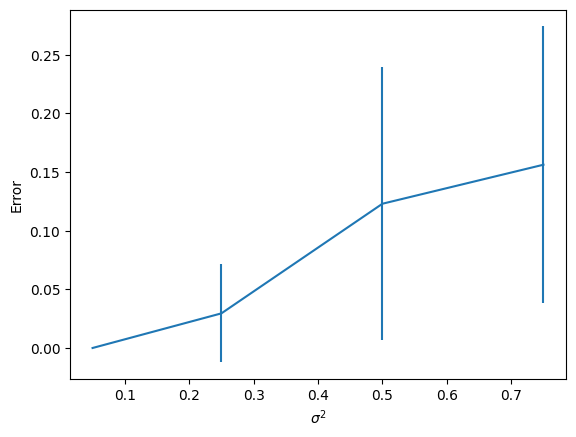

In [ ]:
plt.figure()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("Error")
plt.errorbar(var_list, mean_error, yerr=std_error)
plt.show()

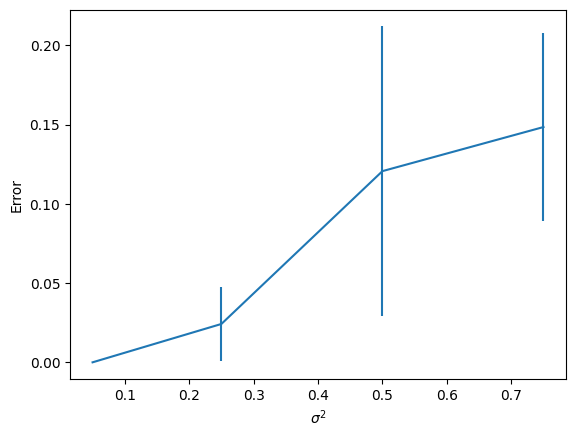

In [ ]:
plt.figure()
plt.xlabel(r"$\sigma^2$")
plt.ylabel("Error")
plt.errorbar(var_list, mean_error, yerr=std_error)
plt.show()

**Comment the results as best as you can. For instance, what is the influence of $N$ on the experiment?**:

It appears that N doesn't have any impact on the Error however bigger N ted to have bigger std values on the errors.

## Part 4: Label flipping noise
Here we generate one data set with $\sigma^2=0.15$. A new random data set is now obtained by flipping each label $d(n)$ with probability $p$ to obtain $\tilde{d}(n)$. Considering the generated data set $\{\mathbf{x}(n),{\tilde d}(n)\}_{n=1}^{200}$, repeat the previous experiments for  $p\in \{0\%, 5\%, 10\%, 20\%\}$ and evaluate $e(p)$ and $\sigma^2(p)$. Comment.

**Complete a function that flips labels with probability $p$.**

In [33]:
def flip_labels(Y,p):
  flip = np.random.rand(len(Y), 1) < p
  return np.logical_xor(Y,flip)

In [43]:
# Test the label flip function:
np.sum(flip_labels(Y,0.2) != Y)/Y.shape[0]

0.29

## Complete the code for the experiment:

In [44]:
np.random.seed(0)

# probability of flipping the labels
probabilities = [0, 0.05, 0.1, 0.2]

# dataset size
N = 200

var = 0.15

mean_error = []
std_error = []

for p in probabilities:

    e = []

    for i in range(50):

        # generate data
        X, Y = generate_data(N = N, mean_1 = [1,0], mean_2 = [-1,0], var = var)

        # flip some labels
        Y = flip_labels(Y, p)

        # Train the perceptron. Include bias if necessary
        if include_bias:
          w = perceptron(np.concatenate((X, np.ones([len(X), 1])), axis = 1), Y, lr, nb_epochs=100, eps=1e-4)
        else:
          w = perceptron(X, Y, lr, nb_epochs=100, eps=1e-4)

        # predict
        Y_pred = predict(X,w)

        # evaluate
        acc = accuracy(Y, Y_pred)
        e.append( 1-acc )

    mean_error.append( np.mean(e) )
    std_error.append( np.std(e) )

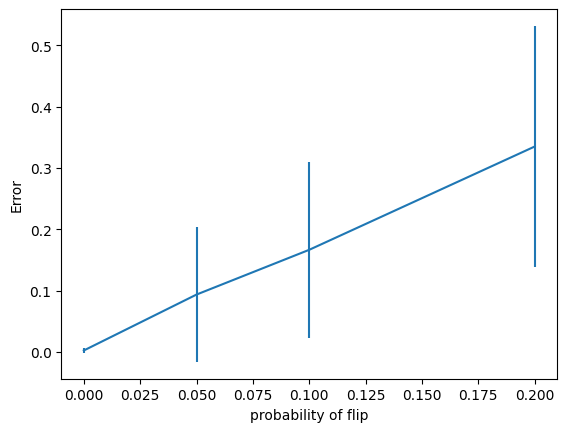

In [45]:
plt.figure()
plt.xlabel("probability of flip")
plt.ylabel("Error")
plt.errorbar(probabilities, mean_error, yerr=std_error)
plt.show()

**Comment the results as best as you can:**

The error grows liearly with the probabilty of flip which is logical, the more the data is eroned the more it will create errors (a point will be set on the other side of the hyperpla radomly and won't affect the trainig since it's oly one point).

# Exercise 2: Real data

Let's play with the real data now, called the **Iris flower data set**. This data set is widely used in machine learning and can be found in [here](https://archive.ics.uci.edu/ml/datasets/iris) or in the machine learning package **Scikit-learn**.

Iris is is a popular garden flower. As well as being the scientific name, iris is also widely used as a common name for all Iris species, as well as some belonging to other closely related genera.

This dataset set contains a set of 150 samples, which consists of 50 samples from each of three species of Iris:

*   setosa (label 0)
*   versicolor (label 1)
*   virginica (label 2)

Each sample was measured in four features: sepal length, sepal width, petal length, and petal width.


<table>
    <tr>
        <td style="text-align:center;">
            <figure>
                <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/330px-Iris_virginica_2.jpg" alt="Iris virginica">
                <figcaption>Fig 4 (a): Iris virginica</figcaption>
            </figure>
        </td>
        <td style="text-align:center;">
            <figure>
                <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Irissetosa1.jpg/330px-Irissetosa1.jpg" alt="Iris setosa">
                <figcaption>Fig 4 (b): Iris setosa</figcaption>
            </figure>
        </td>
        <td style="text-align:center;">
            <figure>
                <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/330px-Blue_Flag%2C_Ottawa.jpg" alt="Iris versicolor">
                <figcaption>Fig 4 (c): Iris versicolor</figcaption>
            </figure>
        </td>
    </tr>
</table>

## Part 1: Data Preparation and Visualization

Below we import the library sklearn and the dataset. Take your time to analyse the dataset structure and familiarize yourself with the problem. Can you make any prediction on the class separability?

****

In [46]:
# Importing the Iris dataset

from sklearn import datasets
iris = datasets.load_iris()
# setosa: 0
# versicolor: 1
# virginica: 2

irisDf = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


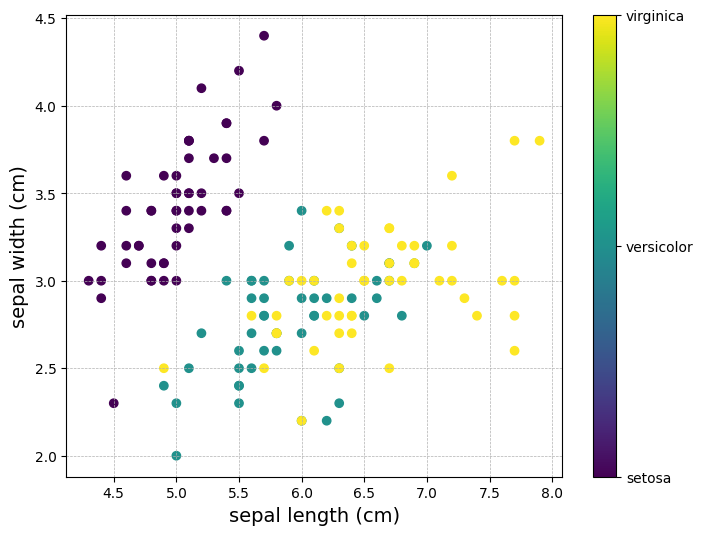

In [47]:
plot( irisDf[['sepal length (cm)','sepal width (cm)']].values, irisDf['target'].values,
    xlabel='sepal length (cm)', ylabel='sepal width (cm)', tick_labels=['setosa', 'versicolor', 'virginica'] )

## Part 2: Perceptron classifier

Now consider only the data set containing two classes: setosa and versicolor.

In [48]:
# Selecting the first two classes: setosa, versicolor

irisDfBinary = irisDf.loc[ irisDf['target'] != 2 ]
irisDfBinary.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Plot only setosa and versicolor. Are the classes separable? Is bias necessary?**

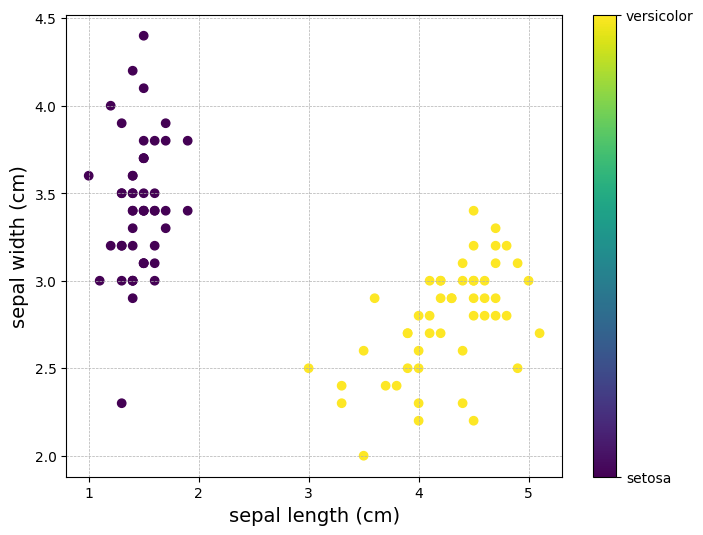

In [52]:
plot( irisDfBinary[['petal length (cm)','sepal width (cm)']].values, irisDfBinary['target'].values,
    xlabel='sepal length (cm)', ylabel='sepal width (cm)', tick_labels=['setosa', 'versicolor'])

## Build a dataset

**Complete the code such that $X$ contains the training inputs and $Y$ the labels.**


In [80]:
# Build dataset

X = irisDfBinary[['sepal length (cm)','sepal width (cm)']].values
Y = irisDfBinary[['target']].values

print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))


X: (100, 2)
Y: (100, 1)


**Shuffle data with the code you made in part one. Should we do this before the train/test split?**

In [81]:
# Shuffle data using the function you made on Part 1

X, Y = shuffle_data(X, Y)

## Train/Test split

**Split the data set into a balanced (with respect to the labels) training and test set, containing respectively $80\%$ and $20\%$ of the data set.**

In [82]:
# Split the data into balanced training (80%) and test (20%) sets

X_train, X_test, Y_train, Y_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):], Y[:int(0.8*len(X))], Y[int(0.8*len(X)):]

## Running the perceptron algorithm

**Run the perceptron on the train set and evaluate on the test set. Comment your results.**

In [83]:
def predict(X, w):
  # include bias
  if w.shape[0] == 3:

    Y_pred = heavy(np.dot(np.concatenate((X, np.ones([len(X), 1])), axis=1), np.expand_dims(np.transpose(w), 1)))
  else:
    Y_pred = heavy(np.dot(X, np.expand_dims(np.transpose(w), 1)))
  # Add one dimension along axis -1
  return Y_pred

In [85]:
# Train the perceptron. Include bias if necessary
lr = 1
include_bias = True
if include_bias:
  w = perceptron(np.concatenate((X_train, np.ones([len(X_train), 1])), axis = 1), Y_train, lr, nb_epochs=100, eps=1e-4)
else:
  w = perceptron(X_train, Y_train, lr, nb_epochs=100, eps=1e-4)
print(w)

[ 480.6 -845.6  -75. ]


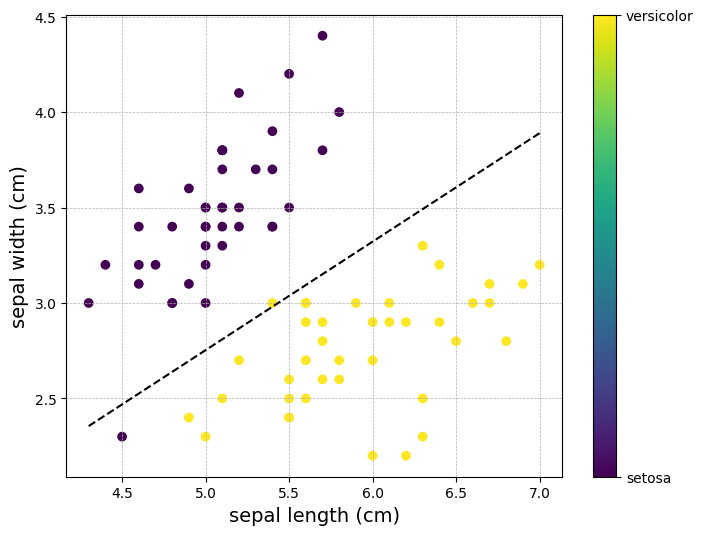

In [86]:
# Training data and separating hyperplane

plot(X_train, Y_train, w=w, xlabel='sepal length (cm)', ylabel='sepal width (cm)', tick_labels=['setosa', 'versicolor'])

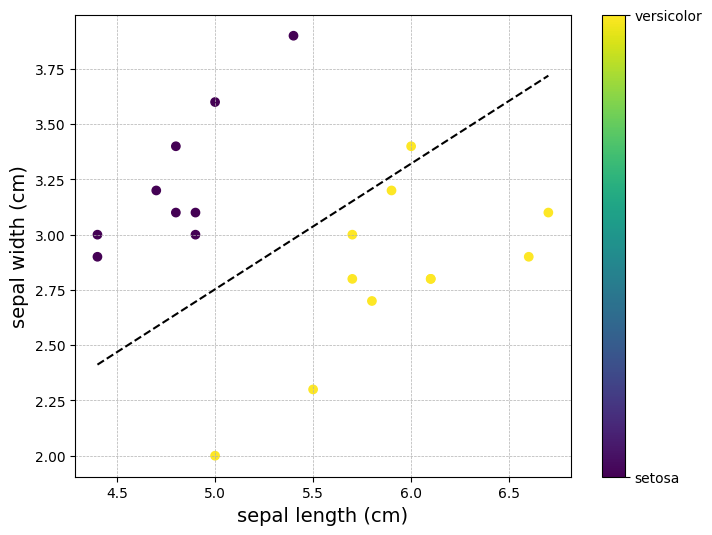

In [87]:
# Test data and separating hyperplane

plot(X_test, Y_test, w=w, xlabel='sepal length (cm)', ylabel='sepal width (cm)', tick_labels=['setosa', 'versicolor'] )

In [ ]:
# Train and test errors

# predict
Y_train_pred = predict(X_train,w)

# evaluate
train_accuracy = accuracy(Y_train, Y_train_pred)
print("Train accuracy: {}".format(train_accuracy))

Train accuracy: 0.9875


In [88]:
# predict
Y_test_pred = predict(X_test,w)

# evaluate
test_accuracy = accuracy(Y_test, Y_test_pred)
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.95


**Comments:** It works, the data is well classified

## Part 3 (Bonus points for other TPs): Application to multi-label classification

Can you think with of algorithm to classify all 3 classes of the Iris dataset by expanding what we learned on this notebook?

Propose a method to implement a three class classifier with multiple binary classifiers.

This idea takes us to the One-versus-All method (for more information check the chapter 17 of the Book: ”Understanding Machine Learning: From Theory to Algorithms”, by Shai Shalev-Shwartz and Shai Ben-David).

We can put 3 perceptons in parallele one for each class, it returns a vectors of three bit composed of 100, 010, or 001 depending on the class the etworks thinks it is.

# Comments of the students:

To improve the experience of students that will take the course on the future any thoughtful comment or suggestion will be much appreciated!

In [ ]:
#Pretty cool tp, great application of the course